# The SimIM Interface for Halo Catalogs

One of **SimIM**'s features is a uniform format for cosmological simulations. Once simulations are written into this format the ``simim.siminterface.SimHandler`` class can interface with any simulation in a homogeneous manner.

This tutorial demonstrates some basic features of the SimHandlers and SnapHandlers **SimIM** uses. Many of these concepts can also be applied to interacting with light cones built in **SimIM**.

In this example and throughout the **SimIM** documentation we use TNG100-3-Dark simulation. This is a simulation box with 100 Mpc sides, a dark matter particle mass of $4\times10^8$ $M_\odot$, and no Baryonic physics. We use this simulation because the total data volume is relatively small (~3 GB compared to ~1 TB for the full physics, full resolution TNG300-1 simulation). For most scientific applications it is advisable to utilize a higher resolution simulation. However the smaller, low-resolution TNG100-3 can be downloaded, formatted, and loaded much more quickly, making it useful for demonstration and testing purposes.

In [43]:
import numpy as np
import textwrap

import matplotlib.pyplot as plt
from matplotlib import rcParams
pltsty = {
    'font.size' : 18,

    # Axis appearance
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,

    # Legends
    'legend.frameon' : False,

    # Lines
    'lines.dashed_pattern' : [5,3],
}
rcParams.update(pltsty)

# We've downloaded and formatted the TNG100-3-Dark simulation
# in a previous tutorial. Now we can simply initialize a 
# SimHandler and hit the ground running
import simim.siminterface as sim
tng100 = sim.SimHandler('TNG100-3-Dark')

## Simulation and Snapshot Metadata

A variety of metadata is stored in the SimHandler instance:

In [5]:
for key, value in tng100.metadata.items():
    print(f"{key}: {value}")

box_edge: 75.0
cosmo_h: 0.6774
cosmo_name: Planck2015
cosmo_omega_baryon: 0.0486
cosmo_omega_lambda: 0.6911
cosmo_omega_matter: 0.3089
groupcat_number_files: 4
name: TNG100-3-Dark
number_snaps: 100
snapshots: [( 0, 2.0046492e+01, 1.7087862e+01, 2.0046492e+01,  0.17781216,  0.22342461, 7250.3267  , 7434.8086  , 7250.3267  , 7434.8086  )
 ( 1, 1.4989173e+01, 1.3289812e+01, 1.7087862e+01,  0.22342461,  0.3186268 , 6933.908   , 7250.3267  , 6933.908   , 7250.3267  )
 ( 2, 1.1980213e+01, 1.1452663e+01, 1.3289812e+01,  0.3186268 ,  0.39193386, 6731.1284  , 6933.908   , 6731.1284  , 6933.908   )
 ( 3, 1.0975643e+01, 1.0460055e+01, 1.1452663e+01,  0.39193386,  0.44409138, 6601.795   , 6731.1284  , 6601.795   , 6731.1284  )
 ( 4, 9.9965906e+00, 9.6818905e+00, 1.0460055e+01,  0.44409138,  0.49361545, 6488.039   , 6601.795   , 6488.039   , 6601.795   )
 ( 5, 9.3887711e+00, 9.1909819e+00, 9.6818905e+00,  0.49361545,  0.5297872 , 6409.671   , 6488.039   , 6409.671   , 6488.039   )
 ( 6, 9.0023403e+

Additionally, we can review the fields in the halo catalogs:

In [12]:
fields = [f for f in tng100.extract_snap_keys()]
print(textwrap.fill(f"The halo catalog fields for this simulation are: " + ', '.join(fields),subsequent_indent='    '))


The halo catalog fields for this simulation are: cm_x, cm_y, cm_z,
    mass, mass_maxr, pos_x, pos_y, pos_z, r_hm, r_vmax, spin_x,
    spin_y, spin_z, v_x, v_y, v_z, vdisp, vmax


## Simulation Snapshots and ``SnapHanlder``
Each simulation is composed of a series of snapshots which contain the halo catalog frozen at a given point in time (or equivalently at a given redshift). Because the simulations are large, by default the SimHandler doesn't load the data for the snapshots - this is done to reduce memory usage since many applications don't require using data from all snapshots. To interact with data from an individual snapshot, we need to retrieve it.

First let's determine the snapshot associated with our redshift of interest. We'll search for the snapshot closest to z=1.0:

In [13]:
z = 1.0
snap = tng100.z_to_snap(z)
print(textwrap.fill(f"The snapshot closest to redshift {z :.1f} has index {snap}",subsequent_indent='    '))

The snapshot closest to redshift 1.0 has index 50


Now we can load this snapshot into memory. Each snapshot comes with its own SnapHandler object which is used to store both metadata and the halo catalog for that snapshot.

In [14]:
tng100_z1 = tng100.get_snap(snap)

### Equivalently we could have used
# tng100_z1 = tng100.get_snap_from_z(z)

SnapHandlers still don't automatically load all of the data for a snapshot, again trying to save RAM because we're working with large files. Instead they have a list of properties associated with the halo catalog, which they will load as needed.

We can see the properties associated with a snapshot:

In [15]:
fields = [f for f in tng100_z1.extract_keys()]
print(textwrap.fill("The halo catalog fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

The halo catalog fields for this snapshot are: cm_x, cm_y, cm_z, mass,
    mass_maxr, pos_x, pos_y, pos_z, r_hm, r_vmax, spin_x, spin_y,
    spin_z, v_x, v_y, v_z, vdisp, vmax


We can also specifically see what properties are loaded into memory, what properties are saved to the disk, and what additonal properties have been added since loading the snapshot, but aren't saved to the disk:

In [16]:
fields = [f for f in tng100_z1.extract_keys(set='loaded')]
print(textwrap.fill("The loaded fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

fields = [f for f in tng100_z1.extract_keys(set='saved')]
print(textwrap.fill("The saved fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

fields = [f for f in tng100_z1.extract_keys(set='generated')]
print(textwrap.fill("The new fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

The loaded fields for this snapshot are:
The saved fields for this snapshot are: cm_x, cm_y, cm_z, mass,
    mass_maxr, pos_x, pos_y, pos_z, r_hm, r_vmax, spin_x, spin_y,
    spin_z, v_x, v_y, v_z, vdisp, vmax
The new fields for this snapshot are:


We can load fields into memory explicity:

In [17]:
tng100_z1.load_property('pos_x','pos_y','pos_z')

Now printing the loaded fields will list pos_x, pos_y, and pos_z. These are still on the disk and therefore still appear in the saved fields list as well:

In [18]:
fields = [f for f in tng100_z1.extract_keys(set='loaded')]
print(textwrap.fill("The loaded fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

fields = [f for f in tng100_z1.extract_keys(set='saved')]
print(textwrap.fill("The saved fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

fields = [f for f in tng100_z1.extract_keys(set='generated')]
print(textwrap.fill("The new fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

The loaded fields for this snapshot are: pos_x, pos_y, pos_z
The saved fields for this snapshot are: cm_x, cm_y, cm_z, mass,
    mass_maxr, pos_x, pos_y, pos_z, r_hm, r_vmax, spin_x, spin_y,
    spin_z, v_x, v_y, v_z, vdisp, vmax
The new fields for this snapshot are:


We can also make simple plots of these properties. For instance, we can plot the x and y positions
of all halos:

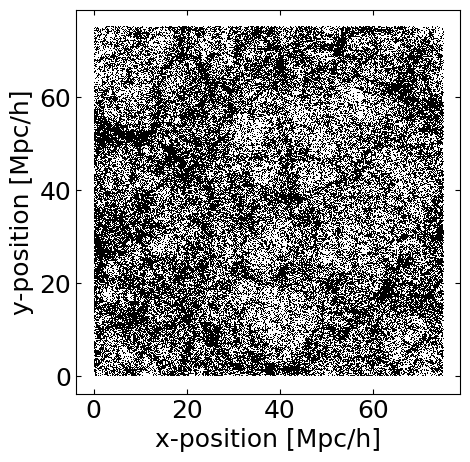

In [19]:
tng100_z1.plot('pos_x','pos_y',
               axkws={'xlabel':'x-position [Mpc/h]','ylabel':'y-position [Mpc/h]','aspect':'equal'},
               plotkws={'marker':',','color':'k'})

This plots all halos x- and y-positions. Because the box is thick in the z-direction as well, it can result in a very dense looking plot. We can fix this by restricting the set of halos we use:

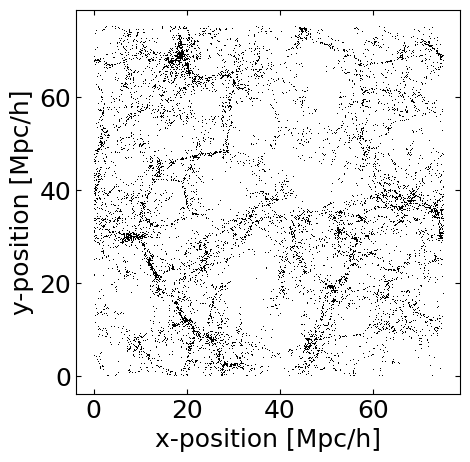

In [20]:
tng100_z1.set_property_range('pos_z',0,10) # Restrict catalog to only halos with pos_z<10 Mpc/h
tng100_z1.plot('pos_x','pos_y',
               axkws={'xlabel':'x-position [Mpc/h]','ylabel':'y-position [Mpc/h]','aspect':'equal'},
               plotkws={'marker':',','color':'k'})

To undo this restriction, simpy call ``set_property_range`` with no arguments. Note that by default ``set_property_range`` will overwrite the last set of restrictions set, so calling ``set_property_range('pos_x',0,10)`` followed by ``set_property_range('pos_y',0,10)`` would result in the halo catalog being restricted only along the y-direction and not the x direction:

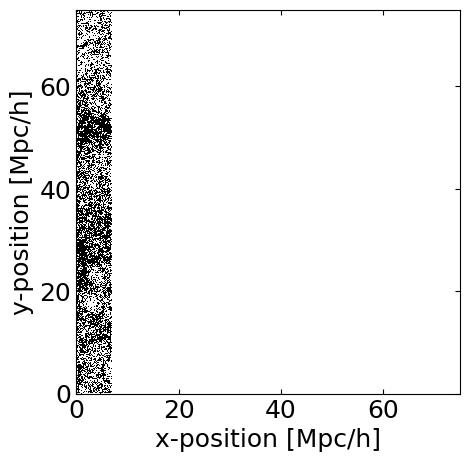

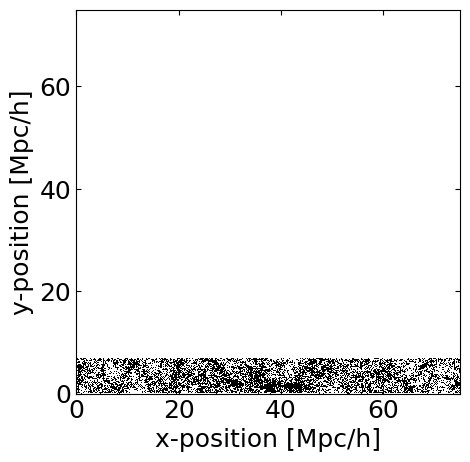

In [21]:
tng100_z1.set_property_range('pos_x',0,10) # Restrict catalog to only halos with pos_x<10 Mpc/h
tng100_z1.plot('pos_x','pos_y',
                 axkws={'xlabel':'x-position [Mpc/h]','ylabel':'y-position [Mpc/h]','aspect':'equal','xlim':[0,75],'ylim':[0,75]},
                 plotkws={'marker':',','color':'k'})

tng100_z1.set_property_range('pos_y',0,10) # Restrict catalog to only halos with pos_y<10 Mpc/h
tng100_z1.plot('pos_x','pos_y',
                 axkws={'xlabel':'x-position [Mpc/h]','ylabel':'y-position [Mpc/h]','aspect':'equal','xlim':[0,75],'ylim':[0,75]},
                 plotkws={'marker':',','color':'k'})


To apply multiple cuts, set the ``reset`` parameter to ``False``:

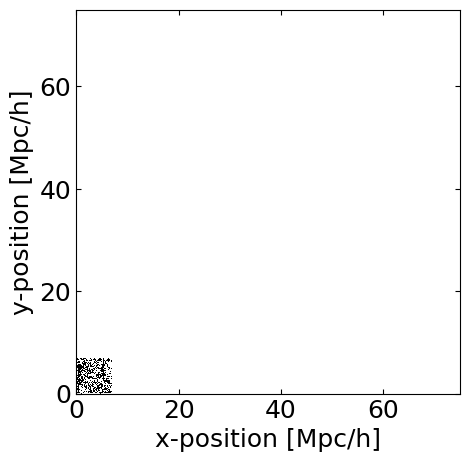

In [22]:
tng100_z1.set_property_range('pos_x',0,10) # Restrict catalog to only halos with pos_x<10 Mpc/h
tng100_z1.set_property_range('pos_y',0,10,reset=False) # Restrict catalog to only halos with pos_y<10 Mpc/h
tng100_z1.plot('pos_x','pos_y',
                 axkws={'xlabel':'x-position [Mpc/h]','ylabel':'y-position [Mpc/h]','aspect':'equal','xlim':[0,75],'ylim':[0,75]},
                 plotkws={'marker':',','color':'k'})

In [23]:
# Undo these cuts.
tng100_z1.set_property_range()

We can also make histograms. Here we'll plot the distribution of halo masses in our catalog. We can see that below a mass of about $10^{10}$ $M_\odot$ the low mass resolution of the TNG100-3 simulation results in a sharp fall off of the number of halos.

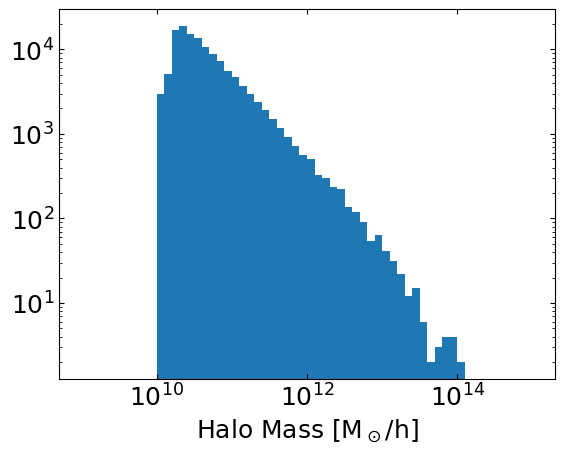

In [44]:
tng100_z1.hist('mass',
                 axkws={'xlabel':'Halo Mass [M$_\odot$/h]','xscale':'log','yscale':'log'}, 
                 plotkws={'bins':np.logspace(9,15,61)})

Note that we never loaded the 'mass' property. The SnapHandler will load (and then unload) the property automatically when it is needed to execute a method call.

## Direct Access to Halo/Galaxy Properties

The ``.plot`` and ``.hist`` methods are meant primarily for exploratory data visualization, and not detailed analysis. It's always possible to extract the underlying data and make more sophisticated plots. The following code is an equivalent way to make the halo mass histogram shown above:

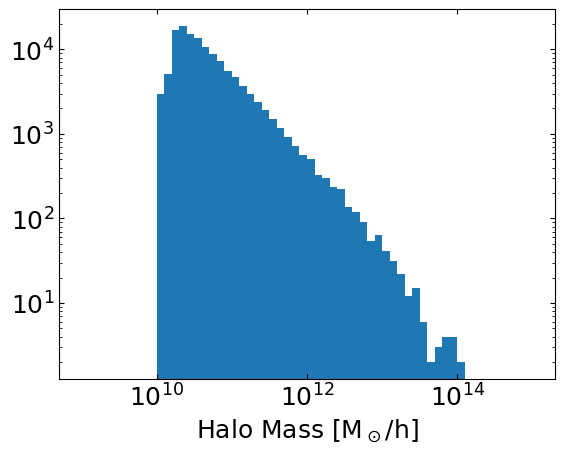

In [45]:
fig, ax = plt.subplots()
ax.set(xlabel='Halo Mass [M$_\odot$/h]',xscale='log',yscale='log')

masses = tng100_z1.return_property('mass')
ax.hist(masses, bins=np.logspace(9,15,61))

plt.show()

Any property associated with a ``SnapHanlder`` instance can be retrieved using the ``.return_property`` method.

## Adding Properties to Simulations

Because TNG100-3-Dark is a dark matter only simulation, it doesn't include important properties needed for modeling galaxy observations, such as star formation rates. We will need to add these ourselves. (Note: we could also use a different simulation which includes a model for star formation, such as the full-hydrodynamics versions of TNG)

**SimIM** handles adding new properties to snapshots (and other objects) using the ``galprops`` module. The key element of this module is the ``Prop`` class, which contains some function for generating a field in the halo catalog, given some existing halo catalog fields, along with basic instructions for how to execute the function.

The ``galprops`` module has a number of pre-defined properties, and we will work with a few of those first before seeing how to construct new ones.

Let's start by assigning star formation rates to each halo. To do this we will use the prescription of Behroozi et al. 2013, which is built into the ``galprops`` module:

In [26]:
# Load the Behroozi et al. halo mass to SFR prescription
from simim.galprops import prop_behroozi_sfr

Adding this property to the halo catalog of our snapshot is very simple:

In [27]:
tng100_z1.make_property(prop_behroozi_sfr)

'sfr' will now appear in the list of properties associated with the snapshot. 
Note that it has been added to the list of loaded fields and the list of newly generated
fields for the snapshot, but not to the list of fields saved to the disk. If we 
want to, we can save our new property using the command ``SnapHandler.write_property('sfr')``.
However, doing so would write the property for only a single snapshot, rather than
the whole simulation, which is not generally desirable. We will revisit writing 
properties to whole simulations in a moment.

In [28]:
fields = [f for f in tng100_z1.extract_keys(set='loaded')]
print(textwrap.fill("The loaded fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

fields = [f for f in tng100_z1.extract_keys(set='saved')]
print(textwrap.fill("The saved fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

fields = [f for f in tng100_z1.extract_keys(set='generated')]
print(textwrap.fill("The new fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

The loaded fields for this snapshot are: pos_x, pos_y, pos_z, sfr
The saved fields for this snapshot are: cm_x, cm_y, cm_z, mass,
    mass_maxr, pos_x, pos_y, pos_z, r_hm, r_vmax, spin_x, spin_y,
    spin_z, v_x, v_y, v_z, vdisp, vmax
The new fields for this snapshot are: sfr


We can also add line luminosities. We can often model the luminosity of a given spectral line to a halo using a prescription of the form $$\log L_\mathrm{line} = a\log\mathrm{SFR}+b+\epsilon(\sigma)$$ where $a$ and $b$ are an emperically determined coeficients of a power law fit and $\epsilon$ is a random scatter drawn from an (assumed) normal distribution of width $\sigma$.

Fits for the correlation between SFR and the 158µm [CII] line have been presented multiple places in the literature. For example DeLooze et al. 2014, provides fits for multiple far infrared lines and multiple galaxy populations. This prescription is also built in to ``galprops``, and we can add it to our halos as follows:

In [30]:
from simim.galprops import prop_delooze_cii
tng100_z1.make_property(prop_delooze_cii,rename='LCII')

By default, prop_delooze_cii uses the fit for the whole galaxy sample presented in DeLooze et al. However, we can also use the fits from subsamples, for example the fit for only starburst galaxies. To do this, we need to specify a few parameters when calling the ``make_property`` method. The ``other_kws`` parameter is a dictionary of keyword arguments that are passed directly to the function call that generates the property - in this case, ``set='starbursts'`` will be passed to the function underlying ``prop_delooze_cii``. Because we already assigned the property 'LCII' (the default property name for ``prop_delooze_cii``), we will also specify a new property name using the ``rename`` parameter to avoid overwriting the previous result.

In [31]:
tng100_z1.make_property(prop_delooze_cii,other_kws={'set':'starbursts'},rename='LCII_sb')

In [32]:
fields = [f for f in tng100_z1.extract_keys(set='loaded')]
print(textwrap.fill("The loaded fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

fields = [f for f in tng100_z1.extract_keys(set='saved')]
print(textwrap.fill("The saved fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

fields = [f for f in tng100_z1.extract_keys(set='generated')]
print(textwrap.fill("The new fields for this snapshot are: "+', '.join([f for f in fields]),subsequent_indent='    '))

The loaded fields for this snapshot are: pos_x, pos_y, pos_z, sfr,
    LCII, LCII_sb
The saved fields for this snapshot are: cm_x, cm_y, cm_z, mass,
    mass_maxr, pos_x, pos_y, pos_z, r_hm, r_vmax, spin_x, spin_y,
    spin_z, v_x, v_y, v_z, vdisp, vmax
The new fields for this snapshot are: sfr, LCII, LCII_sb


Now we can compare the luminosities generated by the two prescriptions:

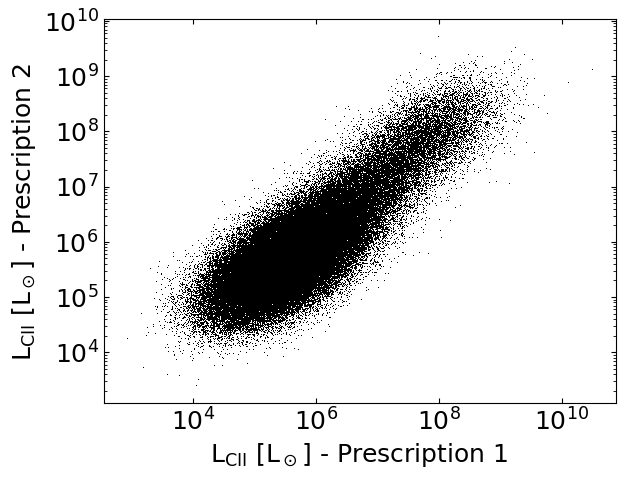

In [33]:
tng100_z1.plot('LCII','LCII_sb',
               axkws={'xlabel':'L$_\mathregular{CII}$ [L$_\odot$] - Prescription 1',
                      'ylabel':'L$_\mathregular{CII}$ [L$_\odot$] - Prescription 2',
                      'xscale':'log','yscale':'log'},
               plotkws={'marker':',','color':'k'})

Note that there is quite a bit of scatter between the two prescriptions. Both prescriptions add a random scatter to the luminosity of every halo, but as it stands we have not done anything to make sure that the same halos are scattered in the same way (i.e. fixed the seed for our random number generator). Let's fix this.

/Users/keenan/Dropbox/4_research/2.1_simim_release/simim/_handlers.py:269: UserWarning: Property LCII already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(name))
/Users/keenan/Dropbox/4_research/2.1_simim_release/simim/_handlers.py:269: UserWarning: Property LCII_sb already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(name))


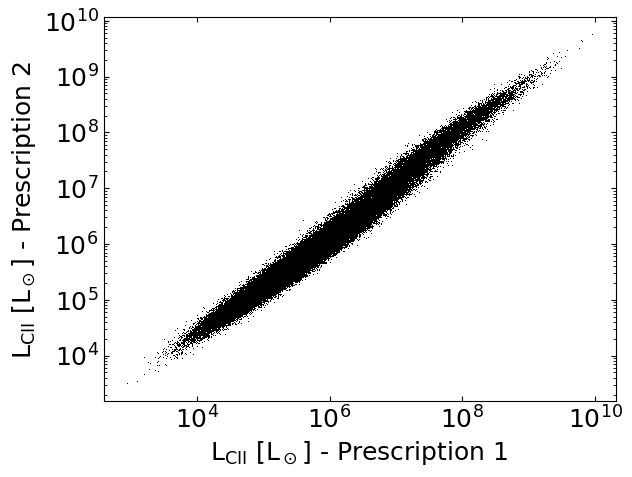

In [34]:
rng = np.random.default_rng(85712)
tng100_z1.make_property(prop_delooze_cii,rename='LCII',other_kws={'rng':rng},overwrite=True)
rng = np.random.default_rng(85712) # Reseed the RNG to get the same numbers for the second application
tng100_z1.make_property(prop_delooze_cii,other_kws={'rng':rng,'set':'starbursts'},rename='LCII_sb',overwrite=True)

tng100_z1.plot('LCII','LCII_sb',
               axkws={'xlabel':'L$_\mathregular{CII}$ [L$_\odot$] - Prescription 1',
                      'ylabel':'L$_\mathregular{CII}$ [L$_\odot$] - Prescription 2',
                      'xscale':'log','yscale':'log'},
               plotkws={'marker':',','color':'k'})

This clearly reduces the scatter between the two prescriptions. Some dispersion remains, because the amplitude of the random scatter added by the two prescriptions differs, but this should be a better starting point for making an apples-to-apples comparisons between results found using the different models.

Now let's implement our own ``Prop`` instance for a different [CII] prescription. (Note: the prescription described here is already built into **SimIM** as ``simim.galprops.prop_schaerer_cii``, we recreate it here for illustrative purposes)

We'll use SFR-[CII] the scaling relation fit by Schaerer et al. 2020 using the z~4-6 galaxies from the ALPINE survey. We begin by defining a function to assign a CII luminosity from a given SFR using the Schaerer fit plus a lognormal scatter of 0.3 dex:

In [35]:
def lcii_schaerer(sfr,scatter_dex=0.3,rng=np.random.default_rng()):

    # Determine mean luminosity from Schaerer fit:
    a = 1.17
    b = 6.61
    lcii = 10**(a*np.log10(np.array(sfr))+b)

    # Add a lognormal scatter
    lcii = lcii / 10**(scatter_dex**2 * np.log(10)/2) # Adjustment required to preserve linear mean
    lcii = lcii * 10**(scatter_dex*rng.normal(loc=0,scale=1,size=lcii.shape))

    return lcii

Now we can wrap this function in a ``Prop`` class that supplies some additional information needed by the SnapHandler to evaluate it. In particular, we will give a default property name, a list of snapshot properties to be passed in the function call (in this case just 'sfr'), the units of the resulting property ($L_\odot$), the dependence of the property on the Hubble parameter, and whether the arguments fed to the function call (SFRs) are expected to have units with little h (they are not) and the values returned by the function call have units with little h (again they do not). All of this little h accounting is because most simulations work with at least some properties in little h units, and keeping these can be useful for translating between different cosmologies. But in most cases similar to correlating SFRs and line luminosities we do not need the little h units, by default the ``prop`` class will assume no h dependence and that all arguments and returns are in units where the h dependence has already been evaluated.

In [36]:
from simim.galprops.galprops import Prop

prop_schaerer_cii = Prop(prop_name='LCII',
                         prop_function=lcii_schaerer,
                         kwargs=['sfr'],
                         units='Lsun',
                         h_dependence=-2,
                         give_args_in_h_units=False,
                         function_return_in_h_units=False)


From here we can use the new ``Prop`` instance in exactly the same manner as we did previously:

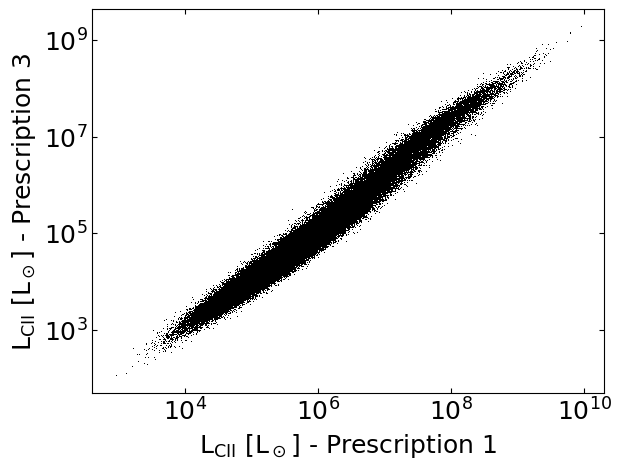

In [37]:
rng = np.random.default_rng(85712) # Reseed the RNG again
tng100_z1.make_property(prop_schaerer_cii,other_kws={'rng':rng},rename='LCII_z5')

tng100_z1.plot('LCII','LCII_z5',
               axkws={'xlabel':'L$_\mathregular{CII}$ [L$_\odot$] - Prescription 1',
                      'ylabel':'L$_\mathregular{CII}$ [L$_\odot$] - Prescription 3',
                      'xscale':'log','yscale':'log'},
               plotkws={'marker':',','color':'k'})

## Interacting with a Simulation Across All Snapshots

Now that we've seen the basics of how adding properties to snapshots works, we can go about adding properties to the entire simulation. This is valuable for assessing the evolution of properties with time, and is also necessary if we want to add new properties to the simulations that can be inherited by light cones (survey volumes) we generate.

The SimHandler has methods for handling this - essentially just wrappers that iterate over each snapshot. We will add SFRs, and our three $L_\mathrm{CII}$ prescriptions to the whole simulation. In the following, we will use our SimHandler instance instead of the SnapHandler instance for only z=1. Otherwise the method calls are quite similar to those used earlier, but the additional argument ``write=True`` will save the new properties we generate to the disk, making them useable again in the future.

In [38]:
rng1 = np.random.default_rng(58290)
tng100.make_property(prop_behroozi_sfr,other_kws={'rng':rng1},write=True,overwrite=True)

rng2 = np.random.default_rng(85712)
tng100.make_property(prop_delooze_cii,other_kws={'rng':rng2},rename='LCII',write=True,overwrite=True)
rng2 = np.random.default_rng(85712)
tng100.make_property(prop_delooze_cii,other_kws={'set':'starbursts','rng':rng2},rename='LCII_sb',write=True,overwrite=True)
rng2 = np.random.default_rng(85712)
tng100.make_property(prop_schaerer_cii,other_kws={'rng':rng2},rename='LCII_z5',write=True,overwrite=True)

Now that we've constructed our properties, let's use assess their evolution over cosmic history. We'll start with the cosmic star formation rate density:

In [39]:
# Function to compute the SFRD
def sfrdensity(sfr,box_edge,h):
    return np.sum(sfr)/(box_edge/h)**3

# 'box_edge', and 'h' are two special keywords that Handler objects recognize
# corresponding to the side length of the box and little h
sfrdensity_val, redshift = tng100.snap_stat(stat_function=sfrdensity,
                                            kwargs=['sfr','box_edge','h'])

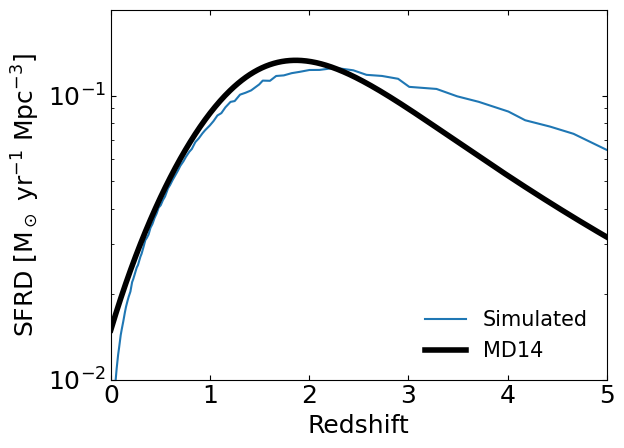

In [46]:
# We'll compare this result to the fit from Madau & Dickinson 2014
redshift_madau = np.linspace(0,10,1000)
sfrdensity_madau = 0.015 * (1+redshift_madau)**2.7 / (1+((1+redshift_madau)/2.9)**5.6)

# Plot the stuff
fig,ax = plt.subplots()
ax.set(xlabel='Redshift',ylabel=r'SFRD [M$_\odot$ yr$^{-1}$ Mpc$^{-3}$]',yscale='log',xlim=[0,5],ylim=[.01,.2])
ax.plot(redshift,sfrdensity_val,color='C0',label='Simulated')
ax.plot(redshift_madau,sfrdensity_madau,color='k',ls='-',lw=4,label='MD14')
ax.legend(fontsize='small')
plt.show()


We can see that our model's SFRD deviates considerably from the fit to data from Madau and Dickinson 2014. These deviations are primarily at z>3 where uncertainties in the SFRD were large when Madau and Dickinson 2014 and Behroozi et al. 2012 were published. More recent data and models are better converged.

We can also implement more sophisticated statistical calculations, such as luminosity functions:

In [57]:
# Function to compute the CII luminosity function
bin_edges = np.logspace(4,11,46)
bin_centers = np.sqrt(bin_edges[1:]*bin_edges[:-1])
def cii_lf(LCII,box_edge,h):
    vol = (box_edge/h)**3
    lf_val, _ = np.histogram(LCII, bin_edges)
    lf_val = lf_val / vol / np.diff(np.log10(bin_edges))
    return lf_val

# 'box_edge', and 'h' are two special keywords that Handler objects recognize
# corresponding to the side length of the box and little h
lf_vals, redshift = tng100.snap_stat(stat_function=cii_lf,kwargs=['LCII','box_edge','h'])

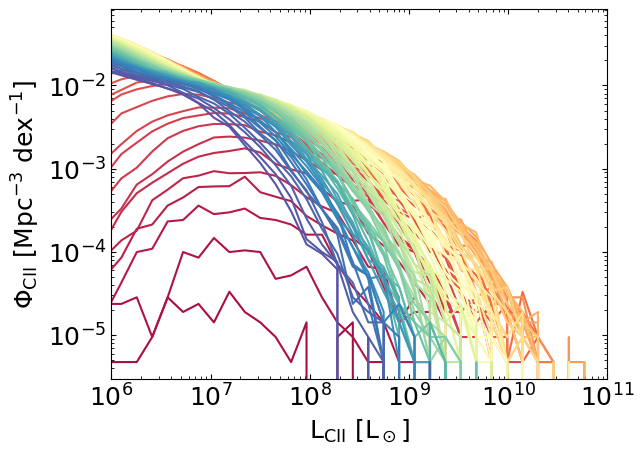

In [59]:
# Plot the redshift evolution of the CII luminosity function for our model

from matplotlib import colormaps

fig,ax = plt.subplots()
ax.set(
    xlabel='L$_\mathregular{CII}$ [L$_\odot$]',
    ylabel='$\Phi_\mathregular{CII}$ [Mpc$^{-3}$ dex$^{-1}$]',
    xscale='log',
    yscale='log',
    xlim=(1e6,1e11)
)

cmap = colormaps['Spectral']
for i,lf_val in enumerate(lf_vals):
    ax.plot(bin_centers,lf_val,color=cmap(i/len(lf_vals)))
plt.show()
